In [18]:
import numpy as np 
import pandas as pd

In [19]:
path ='Social_Network_Ads.csv'
data = pd.read_csv(path)

# Exploring the data

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
data = data.drop(['User ID'],axis=1)

In [22]:
data


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# Visualiz the data

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Lets study Male samples**

In [26]:
male_data =data.loc[(data.Gender=='Male')]

In [27]:
male_data = male_data.drop(['Gender'],axis=1)
male_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
4,19,76000,0
5,27,58000,0
8,25,33000,0
...,...,...,...
390,48,33000,1
391,47,23000,1
393,60,42000,1
396,51,23000,1


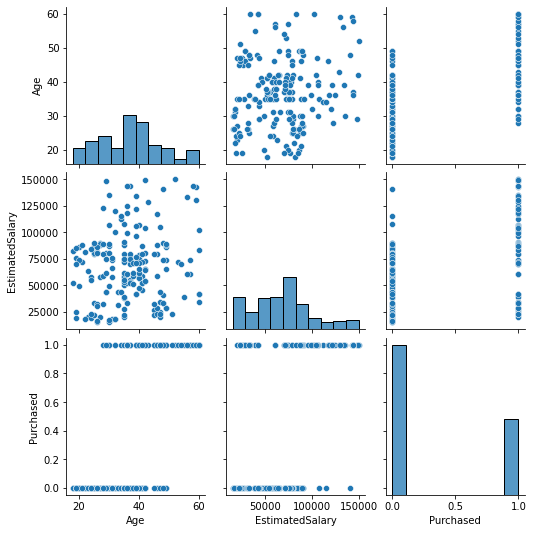

In [28]:
sns.pairplot(male_data)

<Figure size 720x720 with 0 Axes>

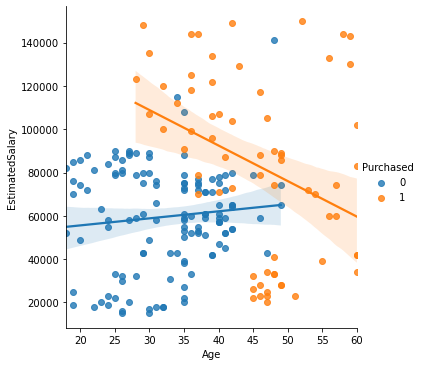

In [29]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Age',y='EstimatedSalary', hue= 'Purchased', data=male_data)

# between 40 and 60 makes more purchase

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

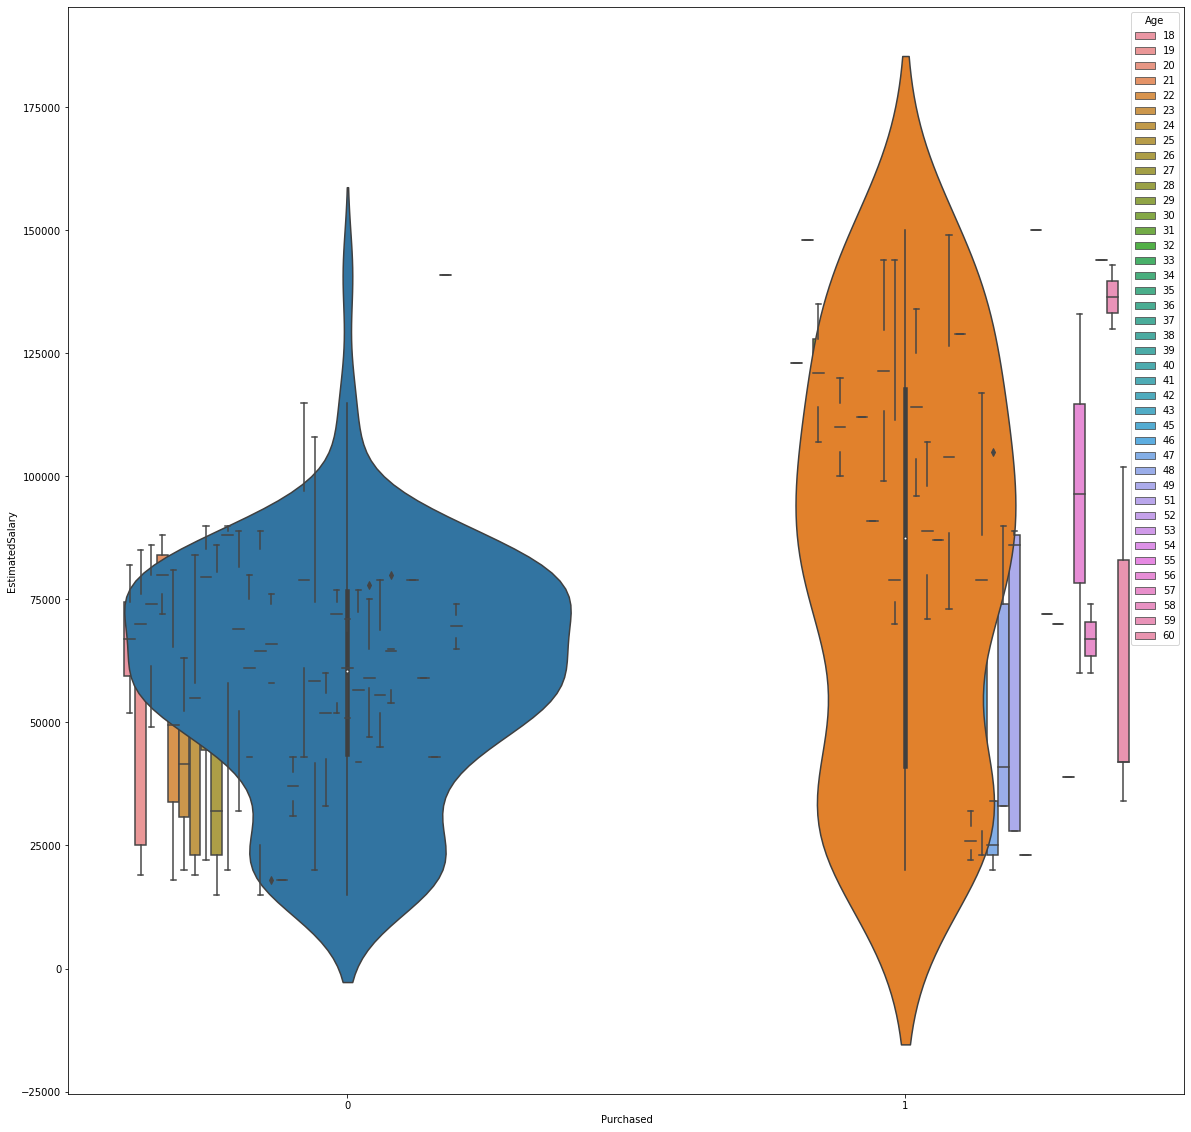

In [30]:
plt.figure(figsize=(20,20))
sns.violinplot(x='Purchased',y='EstimatedSalary', data=male_data)
sns.boxplot(x='Purchased',y='EstimatedSalary', hue='Age', data=male_data)

# EstimatedSalary didn't make a metter but male persones with medium salaty makes more puruchase

**Let's study female samples**

In [31]:
female_data =male_data =data.loc[(data.Gender=='Female')]

In [32]:
female_data = female_data.drop(['Gender'],axis=1)

In [33]:
female_data

,Age,EstimatedSalary,Purchased
2,26,43000,0
3,27,57000,0
6,27,84000,0
7,32,150000,1
9,35,65000,0
...,...,...,...
392,45,45000,1
394,39,59000,0
395,46,41000,1
397,50,20000,1


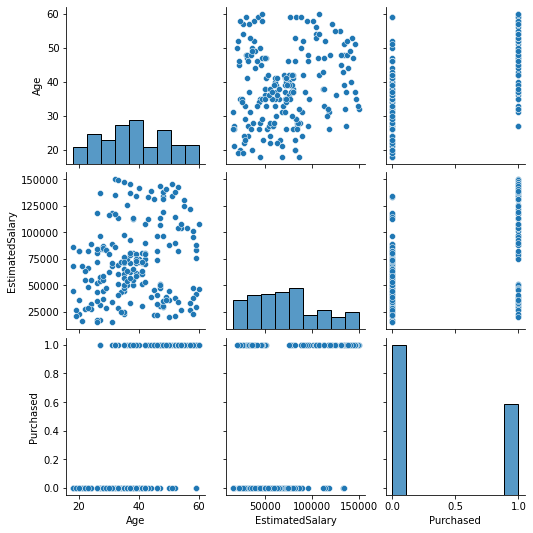

In [34]:
sns.pairplot(female_data)

<Figure size 720x720 with 0 Axes>

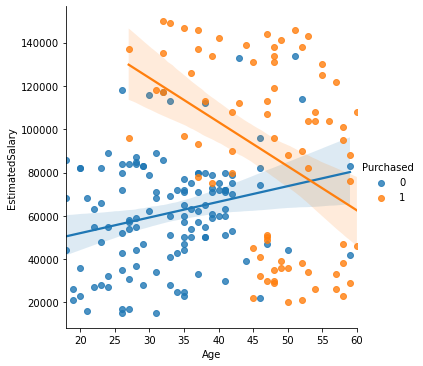

In [35]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Age',y='EstimatedSalary', hue= 'Purchased', data=female_data)

# Age is not a big metter but between 45 and 60 makes more purchase

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

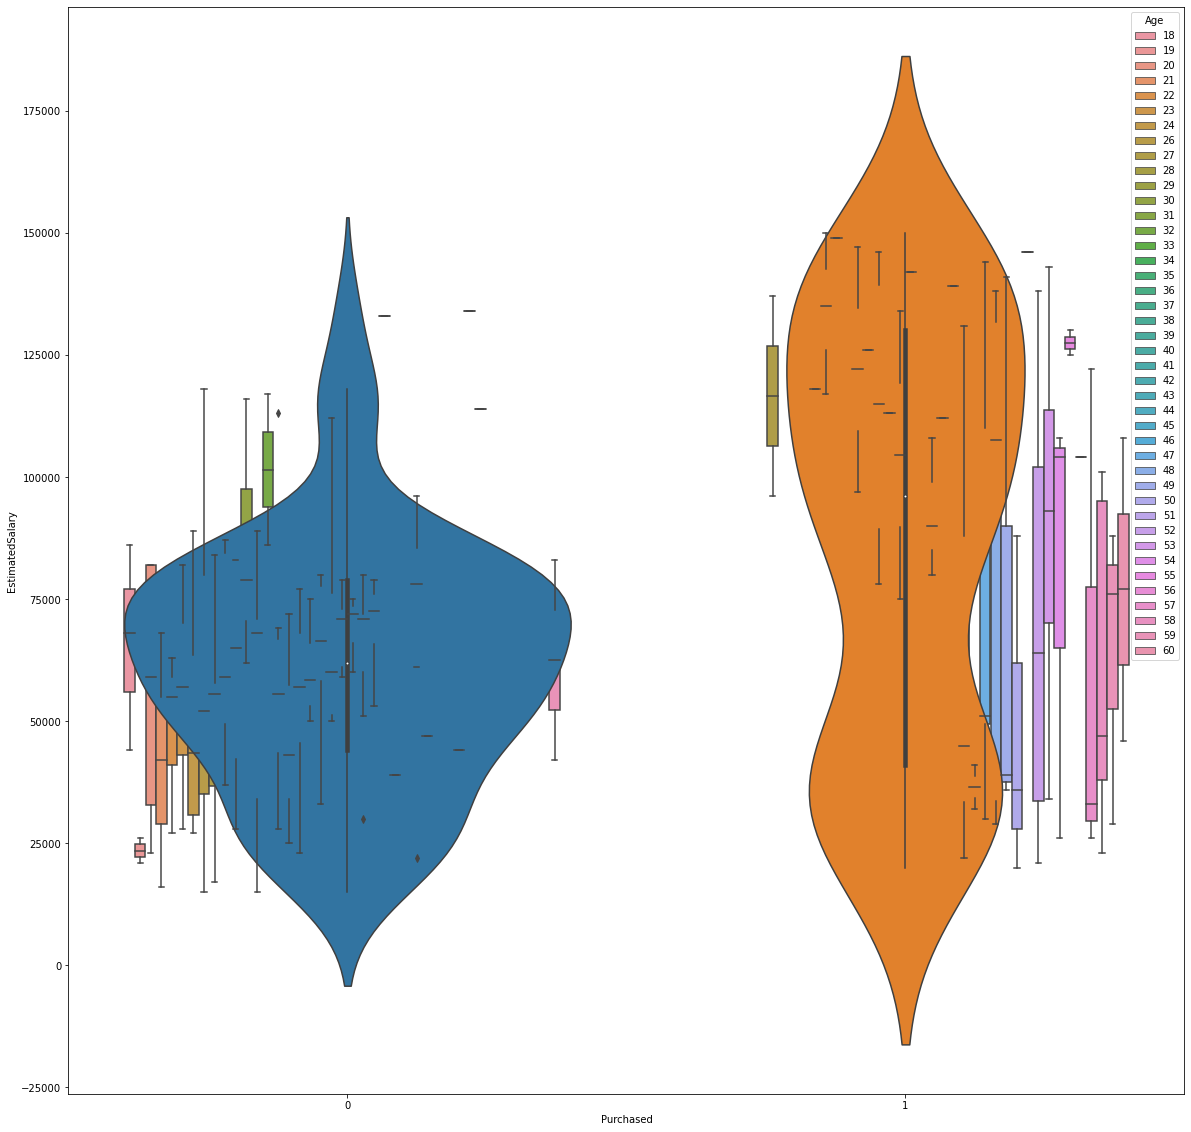

In [36]:
plt.figure(figsize=(20,20))
sns.violinplot(x='Purchased',y='EstimatedSalary', data=male_data)
sns.boxplot(x='Purchased',y='EstimatedSalary', hue='Age', data=male_data)

# EstimatedSalary makes a metter and female persones with hight salaty makes more puruchase

# lets study samples which age>40 for both genders

In [37]:
age_40_data=data.loc[(data.Age>=40)]

In [38]:
age_40_data

,Gender,Age,EstimatedSalary,Purchased
16,Male,47,25000,1
17,Male,45,26000,1
18,Male,46,28000,1
19,Female,48,29000,1
20,Male,45,22000,1
...,...,...,...,...
393,Male,60,42000,1
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1


In [39]:
age_40_data = age_40_data.drop(['Age'],axis=1)

In [40]:
age_40_data

,Gender,EstimatedSalary,Purchased
16,Male,25000,1
17,Male,26000,1
18,Male,28000,1
19,Female,29000,1
20,Male,22000,1
...,...,...,...
393,Male,42000,1
395,Female,41000,1
396,Male,23000,1
397,Female,20000,1


<Figure size 1440x1440 with 0 Axes>

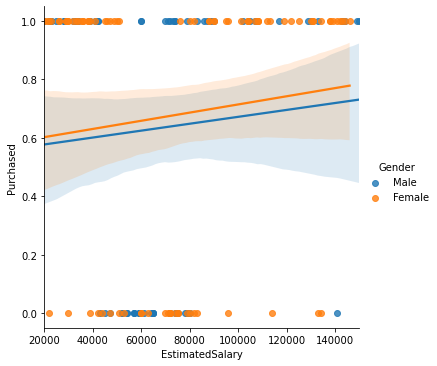

In [41]:
plt.figure(figsize=(20,20))
sns.lmplot(x='EstimatedSalary',y='Purchased', hue= 'Gender', data=age_40_data)

# here we see that female when getting older makes more purchase than the male 

# Now let's prepare the data for trainin

In [42]:
from sklearn.model_selection import train_test_split

# One hot encoder for gender

In [63]:
data['Gender'] =data['Gender'].replace({"Male":0,"Female":1})

In [64]:
Y = data['Purchased']
X = data.drop(['Purchased'], axis=1)

In [65]:
random_state = 2

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state= random_state)

# Preparing the model

In [67]:
from sklearn import tree

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=random_state, min_samples_leaf=30)

In [69]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30, random_state=2)

# Evaluate the model

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
pred = clf.predict(x_test)
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [72]:
acc = accuracy_score(y_test, pred)
acc*100

92.5

In [73]:
from sklearn.metrics import classification_report

In [74]:
clf_rep = classification_report(y_test, pred)
clf_rep

'              precision    recall  f1-score   support\n\n           0       0.92      0.96      0.94        23\n           1       0.94      0.88      0.91        17\n\n    accuracy                           0.93        40\n   macro avg       0.93      0.92      0.92        40\nweighted avg       0.93      0.93      0.92        40\n'

[Text(279.0, 489.24, 'X[1] <= 42.5\nentropy = 0.934\nsamples = 360\nvalue = [234, 126]'),
 Text(167.39999999999998, 380.52000000000004, 'X[2] <= 91500.0\nentropy = 0.624\nsamples = 257\nvalue = [217, 40]'),
 Text(111.6, 271.8, 'X[1] <= 36.5\nentropy = 0.227\nsamples = 218\nvalue = [210, 8]'),
 Text(55.8, 163.08000000000004, 'entropy = 0.0\nsamples = 145\nvalue = [145, 0]'),
 Text(167.39999999999998, 163.08000000000004, 'X[2] <= 67500.0\nentropy = 0.499\nsamples = 73\nvalue = [65, 8]'),
 Text(111.6, 54.360000000000014, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(223.2, 54.360000000000014, 'entropy = 0.742\nsamples = 38\nvalue = [30, 8]'),
 Text(223.2, 271.8, 'entropy = 0.679\nsamples = 39\nvalue = [7, 32]'),
 Text(390.59999999999997, 380.52000000000004, 'X[2] <= 38500.0\nentropy = 0.646\nsamples = 103\nvalue = [17, 86]'),
 Text(334.79999999999995, 271.8, 'entropy = 0.211\nsamples = 30\nvalue = [1, 29]'),
 Text(446.4, 271.8, 'X[1] <= 51.5\nentropy = 0.759\nsamples = 73\nvalue 

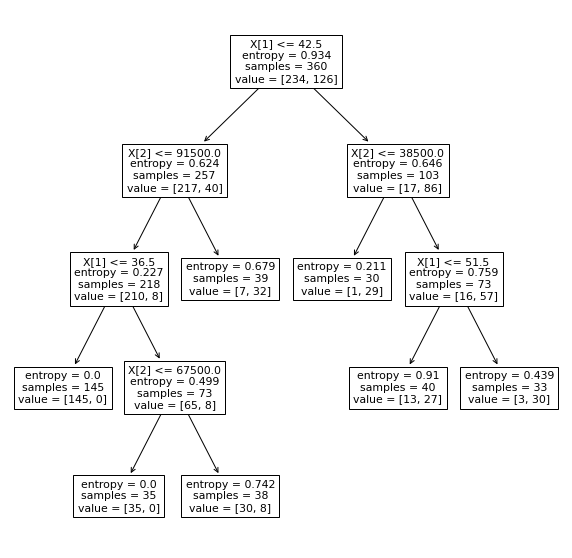

In [75]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf) 

In [77]:
import graphviz 
from sklearn.externals.six import StringIO
dot_data = StringIO()  

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data.getvalue()) 
graph.render("diabetes")

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=["1","0"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
plt.figure(figsize=(8,10))
graph 